# Model Development and Analysis

## Importing Libraries and Loading Data

In [19]:
import pandas as pd


In [20]:
# 1. Load the policies.csv and claims.csv dataset. 
# Loading data
policies = pd.read_csv('policies.csv')
claims = pd.read_csv('claims.csv')

In [21]:
# Checking dfs
policies.head(4)

,Policy_ID,Customer_ID,Policy_Age,Product_Type,Vehicle_Type,Driving_History,Region,Exposure,Premium,Earned_Premium,Ultimate_Losses,Pure_Premium,Reserved_Losses
0,1,861,1,Liability,Truck,1,West,2,931.31,931.31,161.58,80.790988,129.26
1,2,3773,25,Liability,SUV,1,West,26,983.91,983.91,2446.77,94.106621,1957.42
2,3,3093,20,Home,Car,2,Northeast,21,772.97,772.97,3361.05,160.049829,2688.84
3,4,467,17,BOP,Truck,0,South,18,846.10,846.10,835.60,46.422274,668.48


In [22]:
# Checking dfs
claims.head(4)

,Claim_ID,Policy_ID,Claim_Date,Claim_Amount,Claim_Type,Severity
0,1,1,2024-11-19,132.88,Property Damage,132.88
1,2,1,2024-11-12,85.09,Bodily Injury,85.09
2,3,7,2019-04-24,93.94,Property Damage,93.94
3,4,13,2013-08-18,0.00,Property Damage,0.00


## Data Cleaning and Summarization

In [23]:
policies.describe()

,Policy_ID,Customer_ID,Policy_Age,Driving_History,Exposure,Premium,Earned_Premium,Ultimate_Losses,Pure_Premium,Reserved_Losses
count,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,10050.000000,9950.000000
mean,5001.190149,2522.175622,15.146468,0.500995,16.146468,753.924627,753.924627,982.191186,61.657739,784.461113
std,2887.968529,1438.197320,8.841954,0.718415,8.841954,147.556858,147.556858,1430.443634,73.306950,1141.656444
min,1.000000,2.000000,0.000000,0.000000,1.000000,323.340000,323.340000,0.000000,0.000000,0.000000
25%,2499.250000,1263.250000,7.000000,0.000000,8.000000,649.257500,649.257500,0.000000,0.000000,0.000000
50%,5005.500000,2549.500000,15.000000,0.000000,16.000000,743.265000,743.265000,380.975000,36.776369,304.985000
75%,7502.750000,3762.750000,23.000000,1.000000,24.000000,847.637500,847.637500,1411.735000,99.056404,1129.385000
max,10000.000000,4999.000000,30.000000,5.000000,31.000000,1398.810000,1398.810000,12823.260000,502.411693,10258.610000


In [24]:
# 2. Identify and handle missing values in the Reserved_Losses column.
policies.isnull().sum()



Policy_ID            0
Customer_ID          0
Policy_Age           0
Product_Type         0
Vehicle_Type         0
Driving_History      0
Region               0
Exposure             0
Premium              0
Earned_Premium       0
Ultimate_Losses      0
Pure_Premium         0
Reserved_Losses    100
dtype: int64

In [25]:
# Option 1: Imput NaN --> Imput Median proceed with this df
reserved_losses_median = policies['Reserved_Losses'].median()
policies_df = policies
policies_df['Reserved_Losses'].fillna(reserved_losses_median, inplace=False)
policies_df['Reserved_Losses'].isnull().sum()


100

In [26]:
# Option 2: Drop NaN
policies_drop_nan = policies.dropna()
pecent_dropped = round(1 - len(policies_drop_nan) / len(policies), 2) * 100
print(f'Percent Dropped: {pecent_dropped} %')


Percent Dropped: 1.0 %


In [27]:
policies.columns

Index(['Policy_ID', 'Customer_ID', 'Policy_Age', 'Product_Type',
       'Vehicle_Type', 'Driving_History', 'Region', 'Exposure', 'Premium',
       'Earned_Premium', 'Ultimate_Losses', 'Pure_Premium', 'Reserved_Losses'],
      dtype='object')

In [28]:
# 3. Summarize the data by calculating:
#   - Average premium
#   - Total ultimate losses
#   - Average pure premium for each Product_Type
summary = policies_df.groupby('Product_Type').agg(
    Average_Premium=pd.NamedAgg(column='Premium', aggfunc='mean'),
    Total_Ultimate_Losses=pd.NamedAgg(column='Ultimate_Losses', aggfunc='sum'),
    Average_Pure_Premium=pd.NamedAgg(column='Pure_Premium', aggfunc='mean')
).reset_index()

# Checking summary
summary


,Product_Type,Average_Premium,Total_Ultimate_Losses,Average_Pure_Premium
0,Auto,718.072534,1489783.10,61.699596
1,BOP,717.749821,2012607.09,63.048020
2,Home,710.571541,2383081.43,60.939099
3,Liability,863.237989,2532333.90,61.574099
4,Transportation,721.192510,1453215.90,61.066003


## Building a GLM

* Using the policies.csv dataset, build a pure premium model using Policy_Age, Vehicle_Type, and Driving_History as features. 

* Fit a GLM using scikit-learn's LinearRegression and evaluate the model using Root Mean Squared Error (RMSE).

In [29]:
# Importing supporting libraries here for educational purposes only
# Ideally we would import all necessary libraries in single cell at the beginning of the notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np # Will use to calculate RMSE

In [30]:
print(policies_df.columns)
policies_df.head(4)

Index(['Policy_ID', 'Customer_ID', 'Policy_Age', 'Product_Type',
       'Vehicle_Type', 'Driving_History', 'Region', 'Exposure', 'Premium',
       'Earned_Premium', 'Ultimate_Losses', 'Pure_Premium', 'Reserved_Losses'],
      dtype='object')


,Policy_ID,Customer_ID,Policy_Age,Product_Type,Vehicle_Type,Driving_History,Region,Exposure,Premium,Earned_Premium,Ultimate_Losses,Pure_Premium,Reserved_Losses
0,1,861,1,Liability,Truck,1,West,2,931.31,931.31,161.58,80.790988,129.26
1,2,3773,25,Liability,SUV,1,West,26,983.91,983.91,2446.77,94.106621,1957.42
2,3,3093,20,Home,Car,2,Northeast,21,772.97,772.97,3361.05,160.049829,2688.84
3,4,467,17,BOP,Truck,0,South,18,846.10,846.10,835.60,46.422274,668.48


In [31]:
# Selecting features
X = policies_df[['Policy_Age', 'Vehicle_Type', 'Driving_History']]
y = policies['Pure_Premium']

In [32]:
policies_df['Vehicle_Type'].unique()

array(['Truck', 'SUV', 'Car', 'Van', 'Motorcycle'], dtype=object)

In [33]:
# Encoding categorical feature
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[['Vehicle_Type']]),
                                               columns=encoder.get_feature_names_out(['Vehicle_Type']))
X_encoded

,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Truck,Vehicle_Type_Van
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
10045,0.0,1.0,0.0,0.0
10046,0.0,1.0,0.0,0.0
10047,0.0,1.0,0.0,0.0
10048,0.0,1.0,0.0,0.0


**Note:**

* The decision to use `drop='first'` in one-hot encoding depends on the model and problem requirements. 

* Use `drop='first'` to avoid multicollinearity in linear models (e.g., Logistic Regression, GLMs) and simplify features without losing information, as the dropped category can be inferred. 

* Keep all columns for tree-based or non-linear models (e.g., Random Forest, XGBoost) that aren't affected by multicollinearity, as this improves interpretability and handles non-linear interactions. 

* Choose `drop='first'` for linear models and efficiency, while keeping all columns is better for non-linear models and exploratory analysis.

In [34]:
X

,Policy_Age,Vehicle_Type,Driving_History
0,1,Truck,1
1,25,SUV,1
2,20,Car,2
3,17,Truck,0
4,13,SUV,1
...,...,...,...
10045,17,SUV,2
10046,26,SUV,0
10047,2,SUV,0
10048,20,SUV,0


In [35]:
# # Merge encoded features with the other independent feature
X_final = pd.concat([X[['Policy_Age', 'Driving_History']].reset_index(drop=True),
                    X_encoded.reset_index(drop=True)],
                    axis=1)

# Checking X final
X_final

,Policy_Age,Driving_History,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Truck,Vehicle_Type_Van
0,1,1,0.0,0.0,1.0,0.0
1,25,1,0.0,1.0,0.0,0.0
2,20,2,0.0,0.0,0.0,0.0
3,17,0,0.0,0.0,1.0,0.0
4,13,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
10045,17,2,0.0,1.0,0.0,0.0
10046,26,0,0.0,1.0,0.0,0.0
10047,2,0,0.0,1.0,0.0,0.0
10048,20,0,0.0,1.0,0.0,0.0


In [36]:
# Spliting data before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Feature Scaling
# Fit scaler on train only and apply it to test as well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Note:**

* Use `fit_transform()` on the training data to calculate and apply scaling based on its mean and standard deviation.

* Then, use transform on the test data to apply the same scaling without recalculating, avoiding data leakage and ensuring consistent scaling for fair model evaluation.

In [ ]:
# Fit GLM
glm = LinearRegression()
glm.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Create predictions for the test set
y_pred = glm.predict(X_test_scaled)

In [ ]:
# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Checking metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 37.62071605216531
MAE: 28.923700070932618


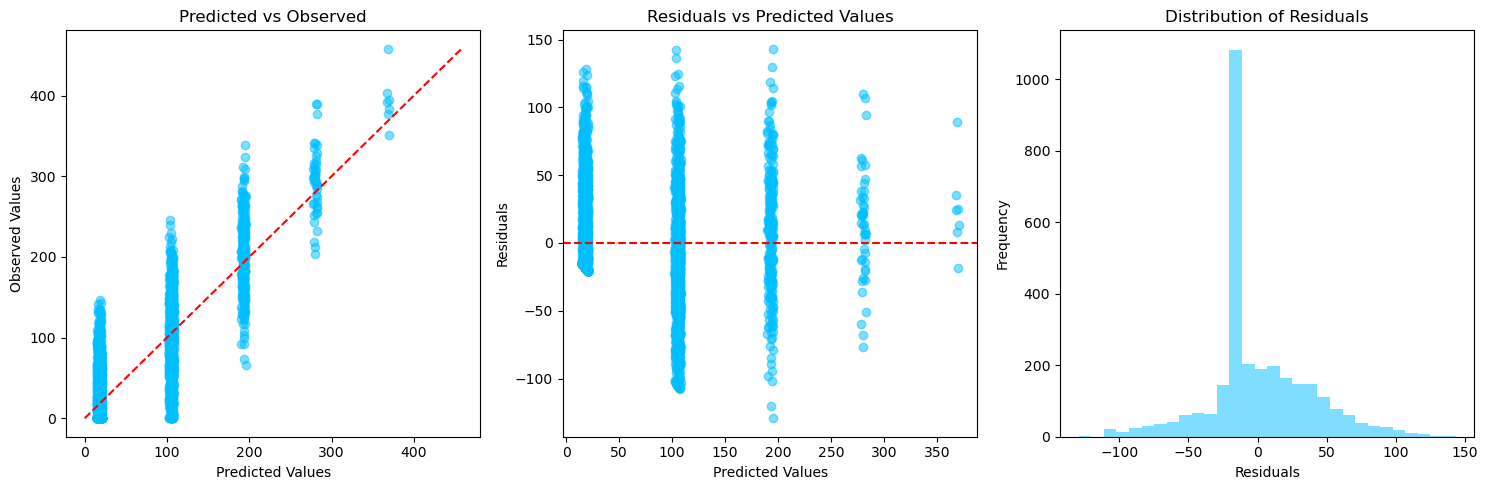

In [ ]:
import matplotlib.pyplot as plt

# Define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First plot: Predicted vs Observed
axes[0].scatter(x=y_pred, y=y_test, alpha=0.5, color='deepskyblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Predicted vs Observed')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Observed Values')

# Second plot: Residuals vs Predicted
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5, color='deepskyblue')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Predicted Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# Third plot: Distribution of Residuals
axes[2].hist(residuals, bins=30, alpha=0.5, color='deepskyblue')
axes[2].set_title('Distribution of Residuals')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


## New Model with Engineered Features

* Create interaction terms between Vehicle_Type and Driving_History to capture non-linear relationships. 

* Explain how these terms could improve the pure premium model.

In [ ]:
# Re-importing libraries for the sake of memorizing to which package each functionalty belongs
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Selecting feature
X = policies_df[['Policy_Age', 'Vehicle_Type', 'Driving_History']]
y = policies_df['Pure_Premium']

# Enconding Vehicle Type
encoder = OneHotEncoder(drop='first', sparse=False)
vehicle_encoded = pd.DataFrame(encoder.fit_transform(X[['Vehicle_Type']]),
                                                     columns=encoder.get_feature_names_out(['Vehicle_Type']))

# Merging encoded features
X_final = pd.concat(
    [X[['Policy_Age', 'Driving_History']].reset_index(drop=True),
     vehicle_encoded.reset_index(drop=True)],
     axis=1
)

# Create a new feature
for col in vehicle_encoded:
    X_final[f'DrivingHistory_{col}'] = X_final['Driving_History'] * X_final[col]

# Spliting data before scaling to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Feature Scaling
# Fit scaler on train only and apply it to test as well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit GLM
glm = LinearRegression()
glm.fit(X_train_scaled, y_train)

# Create predictions for the test set
y_pred = glm.predict(X_test_scaled)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Checking metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 37.62720247922339
MAE: 28.933391530925462


**Explanation:**

* Creating interaction terms allows the model to capture the combined effect of Vehicle_Type and Driving_History on the Pure_Premium. 

* For example, drivers with a high number of prior claims might have a more significant impact on premiums for certain vehicle types (e.g., trucks) compared to others (e.g., motorcycles). 

* These interaction terms enable the model to account for such nuanced relationships, potentially improving predictive performance.


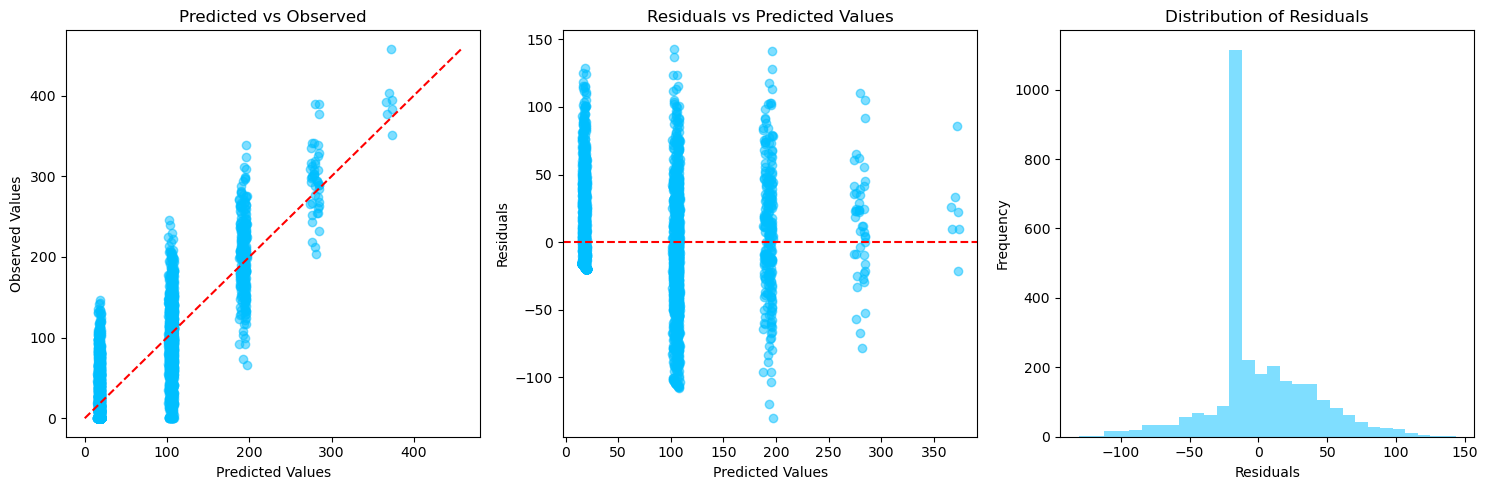

In [85]:
import matplotlib.pyplot as plt

# Define figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# First plot: Predicted vs Observed
axes[0].scatter(x=y_pred, y=y_test, alpha=0.5, color='deepskyblue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axes[0].set_title('Predicted vs Observed')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Observed Values')

# Second plot: Residuals vs Predicted
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5, color='deepskyblue')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals vs Predicted Values')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# Third plot: Distribution of Residuals
axes[2].hist(residuals, bins=30, alpha=0.5, color='deepskyblue')
axes[2].set_title('Distribution of Residuals')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Complete Final Solution: GLM